In [58]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import time

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree


In [59]:
df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv').iloc[:100, :]
# df = pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00


In [60]:
x = df[['condition', 'odometer','mmr']]
x.head()

,condition,odometer,mmr
0,5.0,16639.0,20500.0
1,5.0,9393.0,20800.0
2,45.0,1331.0,31900.0
3,41.0,14282.0,27500.0
4,43.0,2641.0,66000.0


In [61]:
y = df['sellingprice']
y.head()

0    21500.0
1    21500.0
2    30000.0
3    27750.0
4    67000.0
Name: sellingprice, dtype: float64

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state= 0)

In [63]:
numeric_features = ['condition', 'odometer','mmr',]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [64]:
prepocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),

])

In [65]:
re_pipeline = Pipeline(steps=[
    ('prepocessor', prepocessor), 
    ('re_regressor', RandomForestRegressor(n_jobs=-1))
])

In [66]:
start = time.time()
re_pipeline.fit(x_train, y_train)
end = time.time()

print(f"execution time {end - start}")

execution time 0.3039436340332031


In [67]:
y_predict = re_pipeline.predict(x_test)
y_predict

array([33820.5, 20849.5, 31952.5, 21835.5, 56803. , 40787. ,  9893. ,
       20131.5, 39014. , 66508.5, 11305. , 12659. , 21157. , 20774. ,
        8956. ,  6741. , 20525. , 65612. , 43883. , 31762. , 30725. ,
        7404. , 27316. , 22156. , 51840.5, 20922. , 66927. , 21647. ,
       65395.5, 19965.5])

In [68]:
print(np.array(y_test))

[32500. 21500. 30000. 20500. 61500. 41500.  4200. 13600. 40000. 67200.
 11500. 13200. 22250. 21500.  9800. 11500. 14700. 65000. 44500. 32250.
 30000. 11000. 27750. 26500. 51700. 21250. 65000. 21000. 65801. 13000.]


In [69]:
print(mean_absolute_error(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

1992.7833333333333
8421608.008333333
0.976368353888361


In [70]:
# Hyperparamter tuning

In [71]:
param_grid = {
    're_regressor__n_estimators':[100,200,300],
    're_regressor__max_features': [ 'sqrt', 'log2'],
    're_regressor__max_depth':[None, 10,20,30],
    're_regressor__min_samples_split':[2,5,10],
    're_regressor__min_samples_leaf':[1,2,4],
}

In [72]:
grid_search = GridSearchCV(estimator=re_pipeline,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='r2')

In [73]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prepocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['condition',
                                                                          'odometer',
                                                                          'mmr'])])),
                                       ('re_regressor',
                                        RandomForestRegressor(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'re_regressor__max_depth': [None, 10, 20, 30],
                         're_regressor__max_features': ['sqrt', 'log2'],
                         're_regressor__min_samples_leaf': [1, 2, 4],
                         're_regressor__min_samples_split': [2, 5, 10],
                         're_regressor__n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [74]:
grid_search.best_params_

{'re_regressor__max_depth': 10,
 're_regressor__max_features': 'sqrt',
 're_regressor__min_samples_leaf': 1,
 're_regressor__min_samples_split': 2,
 're_regressor__n_estimators': 300}

In [75]:
best_model =grid_search.best_estimator_

In [76]:
y_predict = best_model.predict(x_test)

In [77]:
y_predict

array([32072.83333333, 26472.30092593, 32287.33333333, 25564.27777778,
       50344.74074074, 38851.83333333, 14417.39444444, 17102.45833333,
       37568.        , 62828.44444444, 12729.81666667, 23636.5       ,
       25581.72222222, 20047.37419109, 12026.93333333, 14155.33333333,
       16705.30555556, 61031.85714286, 46308.83333333, 31642.83333333,
       29007.        , 24023.        , 28194.66666667, 25383.77777778,
       45619.5       , 18231.26923077, 61660.33333333, 26433.33333333,
       59931.22222222, 19821.63472222])

In [78]:
print(np.array(y_test))

[32500. 21500. 30000. 20500. 61500. 41500.  4200. 13600. 40000. 67200.
 11500. 13200. 22250. 21500.  9800. 11500. 14700. 65000. 44500. 32250.
 30000. 11000. 27750. 26500. 51700. 21250. 65000. 21000. 65801. 13000.]


In [79]:
print(r2_score(y_test, y_predict))

0.9225745066411357


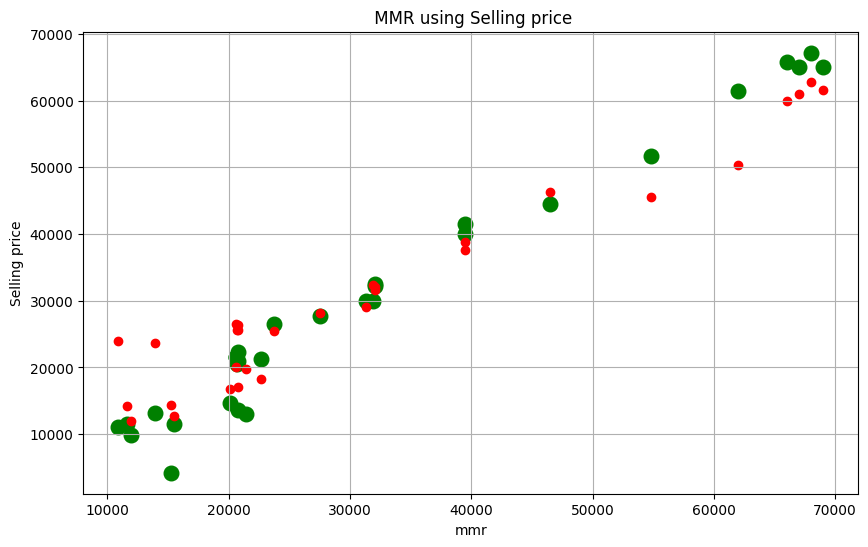

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['mmr'],y_test, color= 'green', s= 110)
plt.scatter(x_test['mmr'],y_predict, color= 'red')

plt.xlabel("mmr")
plt.ylabel("Selling price")
plt.title(" MMR using Selling price")

plt.grid()
plt.savefig('./Graph/2.selling_price_prediction.png')
plt.show()